Plotting
====
Teaching: 10 min
Exercises: 10 min

Questions:
 - "How can I plot my data?"

Objectives:
 - "Create a time series plot showing a single data set."
 - "Create a scatter plot showing relationship between two data sets."

Keypoints:
 - "`matplotlib` is the most widely used scientific plotting library in Python."
 - "Plot data directly from a Pandas data frame."
 - "Select and transform data, then plot it."
 - "Many styles of plot are available."
 - "Can plot many sets of data together."
---
## `matplotlib` is the most widely used scientific plotting library in Python.

*   Commonly use a sub-library called `matplotlib.pyplot`.
*   The Jupyter Notebook will render plots inline if we ask it to using a "magic" command.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

*   Simple plots are then (fairly) simple to create.

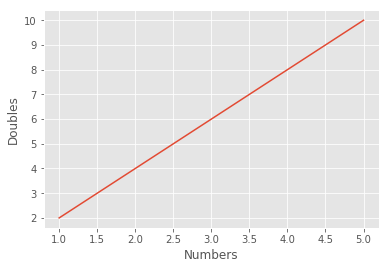

In [19]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.xlabel('Numbers')
plt.ylabel('Doubles')

## Plot data directly from a Pandas data frame.

*   We can also plot Pandas data frames.
*   This implicitly uses `matplotlib.pyplot`.

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text xticklabel objects>)

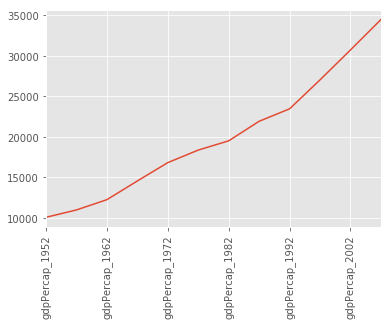

In [20]:
import pandas

data = pandas.read_csv('../gapminder_data/gapminder_gdp_oceania.csv', index_col='country')
data.loc['Australia'].plot()
plt.xticks(rotation=90)

## Select and transform data, then plot it.

*   By default, `DataFrame.plot` plots with the rows as the X axis.
*   We can transpose the data in order to plot multiple series.

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text xticklabel objects>)

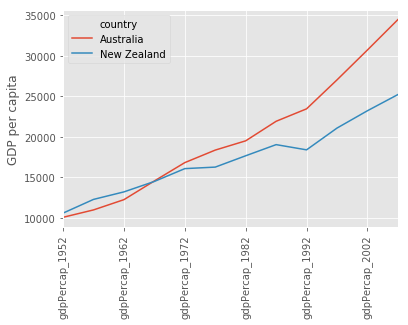

In [21]:
data.T.plot()
plt.ylabel('GDP per capita')
plt.xticks(rotation=90)

## Many styles of plot are available.

*   For example, do a bar plot using a fancier style.

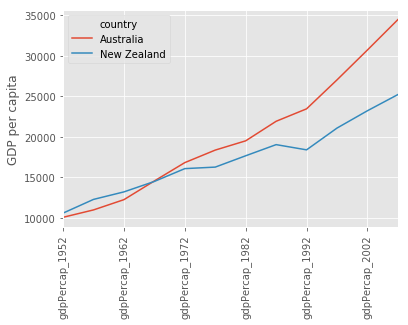

In [22]:
plt.style.use('ggplot')
data.T.plot()
plt.xticks(rotation=90)
plt.ylabel('GDP per capita')

*   Extract years from the last four characters of the columns' names.
    *   Store these in a list using the Accumulator pattern.
*   Can also convert data frame data to a list.

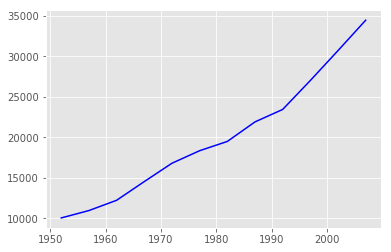

In [23]:
# Accumulator pattern to collect years (as character strings).
years = []
for col in data.columns:
    year = col[-4:]
    years.append(year)

# Australia data as list.
gdp_australia = data.loc['Australia'].tolist()

# Plot: 'b-' sets the line style.
plt.plot(years, gdp_australia, 'b-')

## Can plot many sets of data together.

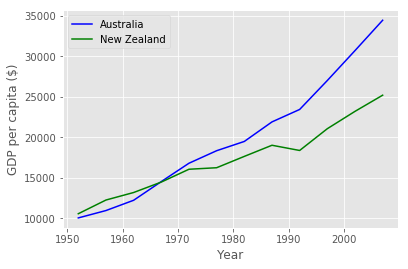

In [24]:
# Accumulator pattern to collect years (as character strings).
years = []
for col in data.columns:
    year = col[-4:]
    years.append(year)

# Select two countries' worth of data.
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

*   Plot a scatter plot correlating the GDP of Australia and New Zealand
*   Use either `plt.scatter` or `DataFrame.plot.scatter`

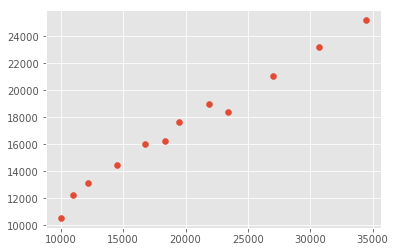

In [25]:
plt.scatter(gdp_australia, gdp_nz)

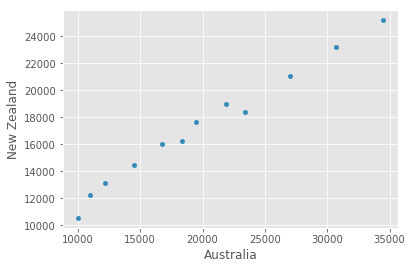

In [26]:
data.T.plot.scatter(x = 'Australia', y = 'New Zealand')

## Exercises

### Minima and Maxima

> Fill in the blanks below to plot the minimum GDP per capita over time
> for all the countries in Europe.
> Modify it again to plot the maximum GDP per capita over time for Europe.

> ~~~
> data_europe = pandas.read_csv('data/gapminder_gdp_europe.csv')
> data_europe.____.plot(label='min')
> data_europe.____
> plt.legend(loc='best')
> ~~~

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text xticklabel objects>)

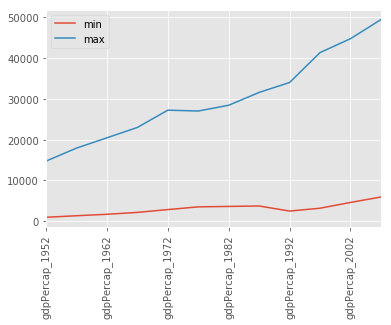

In [31]:
# Solution:
data_europe = pandas.read_csv('../gapminder_data/gapminder_gdp_europe.csv', index_col='country')
data_europe.min().plot(label='min')
data_europe.max().plot(label='max')
plt.legend(loc='best')
plt.xticks(rotation=90)

## Correlations

> Modify the example in the notes to create a scatter plot showing
> the relationship between the minimum and maximum GDP per capita
> among the countries in Asia for each year in the data set.
> What relationship do you see (if any)?



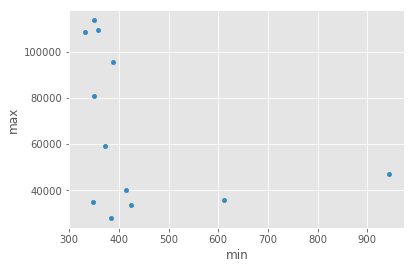

In [30]:
data_asia = pandas.read_csv('../gapminder_data/gapminder_gdp_asia.csv')
data_asia.describe().T.plot(kind='scatter', x='min', y='max')

### Solution
No particular correlations can be seen between the minimum and maximum gdp values year on year. It seems the fortunes of asian countries do not rise and fall together.

> You might note that the variability in the maximum is much higher than
> that of the minimum.  Take a look at the maximum and the max indexes:

gdpPercap_1952          Kuwait
gdpPercap_1957          Kuwait
gdpPercap_1962          Kuwait
gdpPercap_1967          Kuwait
gdpPercap_1972          Kuwait
gdpPercap_1977          Kuwait
gdpPercap_1982    Saudi Arabia
gdpPercap_1987          Kuwait
gdpPercap_1992          Kuwait
gdpPercap_1997          Kuwait
gdpPercap_2002       Singapore
gdpPercap_2007          Kuwait
dtype: object
gdpPercap_1952    Myanmar
gdpPercap_1957    Myanmar
gdpPercap_1962    Myanmar
gdpPercap_1967    Myanmar
gdpPercap_1972    Myanmar
gdpPercap_1977    Myanmar
gdpPercap_1982    Myanmar
gdpPercap_1987    Myanmar
gdpPercap_1992    Myanmar
gdpPercap_1997    Myanmar
gdpPercap_2002    Myanmar
gdpPercap_2007    Myanmar
dtype: object


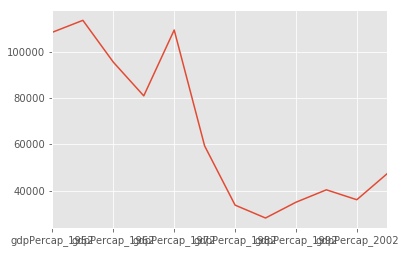

In [34]:
data_asia = pandas.read_csv('../gapminder_data/gapminder_gdp_asia.csv', index_col='country')
data_asia.max().plot()
print(data_asia.idxmax())
print(data_asia.idxmin())

>Seems the variability in this value is due to a sharp drop after 1972. Some geopolitics at play perhaps? Given the dominance of oil producing countries, maybe the Brent crude index would make an interesting comparison? Whilst Myanmar consistently has the lowest gdp, the highest gdb nation has varied more notably.

## More Correlations

> This short programs creates a plot showing
> the correlation between GDP and life expectancy for 2007,
> normalizing marker size by population:
>
> ~~~
> 
> ~~~
> {: .python}
>
> Using online help and other resources,
> explain what each argument to `plot` does.
{: .challenge}

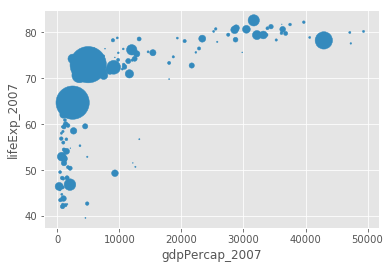

In [37]:
data_all = pandas.read_csv('../gapminder_data/gapminder_all.csv')
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
               s=data_all['pop_2007']/1e6)

A good place to look is the documentation for the plot function - help(data_all.plot).

kind - As seen already this determines the kind of plot to be drawn.

x and y - A column name or index that determines what data will be placed on the x and y axes of the plot

s - Details for this can be found in the documentation of plt.scatter. A single number or one value for each data point. Determines the size of the plotted points.

# Key Points

* matplotlib is the most widely used scientific plotting library in Python.
* Plot data directly from a Pandas dataframe.
* Select and transform data, then plot it.
* Many styles of plot are available.
* Can plot many sets of data together.
